In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
cd drive/My\ Drive/ML

/content/drive/My Drive/ML


In [0]:
cd_categorical = pd.read_csv('clean_data_5.csv')

In [0]:
cd_binary = pd.read_csv('clean_data.csv')

#Variable Selection

In [0]:
def prop_injury(df, x):
  t = df[df[x]== 1]
  return (t.shape[0], t.Injury.sum() / t.shape[0])

In [0]:
props = []
for i in cd_binary.columns:
  props.append((i, prop_injury(cd_binary, i)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
props.sort(key = lambda x: x[1][1])

In [0]:
for i in props:
  print(i)

('Unnamed: 0', (1, 0.0))
('Collision_Type_Not Applicable', (2, 0.0))
('Roadway_Surface_Cond_Not Applicable', (1, 0.0))
('Weather_Condition_Not Applicable', (2, 0.0))
('Light_Condition_7. Unknown', (1501, 0.06928714190539641))
('Collision_Type_10. Deer', (41462, 0.07920505523129613))
('Crash_Event_Type_Dsc_23. Animal', (44820, 0.08340026773761713))
('Deer_Nodeer', (55246, 0.12748434275784673))
('Collision_Type_11. Other Animal', (3303, 0.1516802906448683))
('Crash_Event_Type_Dsc_34. Separation of Units', (85, 0.15294117647058825))
('Crash_Event_Type_Dsc_29. Jack Knife', (302, 0.15562913907284767))
('Collision_Type_15. Backed Into', (5868, 0.1716087252897069))
('Collision_Type_4. Sideswipe - Same Direction', (65806, 0.1940552533203659))
('Crash_Event_Type_Dsc_6. Parked Vehicle', (23313, 0.1974434864667782))
('Collision_Type_Not Provided', (5, 0.2))
('Driver_Action_Type_Cd_14. Improper Turn - Wide Right Turn', (834, 0.20623501199040767))
('Driver_Action_Type_Cd_15. Improper Turn - Cut Cor

In [0]:
p2 = [(x[1][0] > 3000 or x[1][0] == 0) for x in props]
p2[-1] = False
p2[-2] = False

In [0]:
p2 = np.array(p2)
props = np.array(props)

In [0]:
props_2 = props[p2]

In [0]:
props_2[0:10]

array([['Collision_Type_10. Deer', (41462, 0.07920505523129613)],
       ['Crash_Event_Type_Dsc_23. Animal', (44820, 0.08340026773761713)],
       ['Deer_Nodeer', (55246, 0.12748434275784673)],
       ['Collision_Type_11. Other Animal', (3303, 0.1516802906448683)],
       ['Collision_Type_15. Backed Into', (5868, 0.1716087252897069)],
       ['Collision_Type_4. Sideswipe - Same Direction',
        (65806, 0.1940552533203659)],
       ['Crash_Event_Type_Dsc_6. Parked Vehicle',
        (23313, 0.1974434864667782)],
       ['First_Harmful_Event_of_Entire_7. In Parking Lane or Zone',
        (5275, 0.22085308056872038)],
       ['Roadway_Surface_Cond_3. Snowy', (13067, 0.2371623172878243)],
       ['Weather_Condition_6. Snow', (18987, 0.23742560699425924)]],
      dtype=object)

In [0]:
props_2[108:]

array([['Crash_Event_Type_Dsc_7. Tunnel, Bridge, Underpass, Culvert, etc.',
        (3732, 0.3829046087888532)],
       ['First_Harmful_Event_of_Entire_4. Roadside',
        (60218, 0.3897671792487296)],
       ['Driver_Action_Type_Cd_37. Other', (19911, 0.3903872231429863)],
       ['Driver_Action_Type_Cd_40. Fail to Maintain Proper Control',
        (118875, 0.39425446898002103)],
       ['Collision_Type_16. Other', (21973, 0.3982159923542529)],
       ['VDOT_District_5.Hampton Roads District',
        (190864, 0.3985612792354766)],
       ['First_Harmful_Event_of_Entire_9. Outside Right-of-Way',
        (4474, 0.39986589181940096)],
       ['Crash_Event_Type_Dsc_1. Bank Or Ledge',
        (18157, 0.4192873272016302)],
       ['Crash_Event_Type_Dsc_2. Trees', (34175, 0.44040965618141914)],
       ['Driver_Action_Type_Cd_2. Exceeded Speed Limit',
        (11090, 0.45536519386834984)],
       ['Alcohol_Notalcohol', (52251, 0.461024669384318)],
       ['Driver_Action_Type_Cd_11. Did Not

In [0]:
keep = []
for i in props_2[0:10]:
  keep.append(i[0])
for i in props_2[108:]:
  keep.append(i[0])

In [0]:
len(keep)

40

In [0]:
cd_b2 = cd_binary[keep]

In [0]:
keep[35] = 'Crash_Severity'

In [0]:
cd_cat = cd_categorical[keep]
cd_cat = cd_cat.drop('Fatal_Crashes', axis=1)

In [0]:
y_cat = np.asarray(cd_cat.Crash_Severity)
X_cat = cd_cat.drop('Crash_Severity', axis=1).to_numpy()

In [0]:
cd_Injuries = cd_b2[cd_b2['Injury'] == 1]

In [0]:
cd_nonInjuries = cd_b2[cd_b2['Injury'] == 0].sample(cd_Injuries.shape[0])

In [0]:
cd_b3 = pd.concat([cd_Injuries, cd_nonInjuries])

In [0]:
cd_b3.Injury.sum()

307355

In [0]:
Injury = cd_b3.Injury

In [0]:
cd_b3 = cd_b3.drop(['Fatal_Crashes', 'Injury'], axis=1)

In [0]:
#cd_b3 = cd_b3[['Ped_Nonped']]

In [0]:
cd_b3.columns

Index(['Collision_Type_10. Deer', 'Crash_Event_Type_Dsc_23. Animal',
       'Deer_Nodeer', 'Collision_Type_11. Other Animal',
       'Collision_Type_15. Backed Into',
       'Collision_Type_4. Sideswipe - Same Direction',
       'Crash_Event_Type_Dsc_6. Parked Vehicle',
       'First_Harmful_Event_of_Entire_7. In Parking Lane or Zone',
       'Roadway_Surface_Cond_3. Snowy', 'Weather_Condition_6. Snow',
       'Crash_Event_Type_Dsc_7. Tunnel, Bridge, Underpass, Culvert, etc.',
       'First_Harmful_Event_of_Entire_4. Roadside',
       'Driver_Action_Type_Cd_37. Other',
       'Driver_Action_Type_Cd_40. Fail to Maintain Proper Control',
       'Collision_Type_16. Other', 'VDOT_District_5.Hampton Roads District',
       'First_Harmful_Event_of_Entire_9. Outside Right-of-Way',
       'Crash_Event_Type_Dsc_1. Bank Or Ledge',
       'Crash_Event_Type_Dsc_2. Trees',
       'Driver_Action_Type_Cd_2. Exceeded Speed Limit', 'Alcohol_Notalcohol',
       'Driver_Action_Type_Cd_11. Did Not Have Ri

In [0]:
normalizecol = [ 'Carspeedlimit','LATITUDE', 'LONGITUDE']

In [0]:
from sklearn.preprocessing import normalize
for i in range(len(normalizecol)):
  tonorm = cd_b3[normalizecol[i]].values
  cd_b3[normalizecol[i]] = (tonorm-tonorm.mean())/tonorm.std()

In [0]:
crashes_prepared = cd_b3.to_numpy()

In [0]:
InjuryCat = pd.get_dummies(Injury)

In [0]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, random_state=42, shuffle= True)
X_train_network_cat, X_val_network_cat, y_train_network_cat, y_val_network_cat = train_test_split(X_train_cat, y_train_cat, random_state=42, train_size = 0.75, shuffle = True)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(crashes_prepared, np.asarray(Injury), random_state=42, shuffle= True)
X_train_network, X_val_network, y_train_network, y_val_network = train_test_split(X_train, y_train, random_state=42, train_size = 0.75, shuffle = True)

In [0]:
def createprobabilities(array):
  resultarray = []
  for i in range(len(array)):
    if(array[i]==1):
      resultarray.append([0,1])
    else:
      resultarray.append([1,0])
  return np.asarray(resultarray)

In [0]:
y_train_net_prob = createprobabilities(y_train_network)
y_val_net_prob = createprobabilities(y_val_network)

#Batch Normalization

In [0]:
model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation="softmax")
])

In [0]:
optimizer = keras.optimizers.Adam(amsgrad=True, learning_rate=.0007)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])

In [0]:
model.fit(X_train_network, y_train_net_prob, batch_size=100, epochs = 30,
          validation_data=(X_val_network, y_val_net_prob))

Epoch 1/30
3458/3458 [==============================] - 13s 4ms/step - loss: 0.6388 - accuracy: 0.5998 - recall_9: 0.5998 - precision_9: 0.5998 - val_loss: 0.6316 - val_accuracy: 0.6096 - val_recall_9: 0.6096 - val_precision_9: 0.6096
Epoch 2/30
3458/3458 [==============================] - 13s 4ms/step - loss: 0.6306 - accuracy: 0.6077 - recall_9: 0.6077 - precision_9: 0.6077 - val_loss: 0.6288 - val_accuracy: 0.6120 - val_recall_9: 0.6120 - val_precision_9: 0.6120
Epoch 3/30
3458/3458 [==============================] - 13s 4ms/step - loss: 0.6292 - accuracy: 0.6106 - recall_9: 0.6106 - precision_9: 0.6106 - val_loss: 0.6292 - val_accuracy: 0.6084 - val_recall_9: 0.6084 - val_precision_9: 0.6084
Epoch 4/30
3458/3458 [==============================] - 13s 4ms/step - loss: 0.6283 - accuracy: 0.6122 - recall_9: 0.6122 - precision_9: 0.6122 - val_loss: 0.6258 - val_accuracy: 0.6169 - val_recall_9: 0.6169 - val_precision_9: 0.6169
Epoch 5/30
3458/3458 [==============================] - 13s 

In [0]:
injuries_pred_unfiltered = model.predict(X_test)
injuries_pred = np.argmax(injuries_pred_unfiltered, axis = 1)

In [0]:
model.

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, injuries_pred)

array([[51355, 25674],
       [32124, 44525]])

## More Batch Layers, No Amsgrad

In [0]:
model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(200, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(50, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation="softmax")
])

In [0]:
optimizer = keras.optimizers.Adam(amsgrad=False, learning_rate=.0007)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])

In [0]:
model.fit(X_train_network, y_train_net_prob, batch_size=120, epochs = 30,
          validation_data=(X_val_network, y_val_net_prob))

Epoch 1/30
2882/2882 [==============================] - 12s 4ms/step - loss: 0.6151 - accuracy: 0.6322 - recall_13: 0.6322 - precision_13: 0.6322 - val_loss: 0.6241 - val_accuracy: 0.6239 - val_recall_13: 0.6239 - val_precision_13: 0.6239
Epoch 2/30
2882/2882 [==============================] - 12s 4ms/step - loss: 0.6153 - accuracy: 0.6320 - recall_13: 0.6320 - precision_13: 0.6320 - val_loss: 0.6220 - val_accuracy: 0.6256 - val_recall_13: 0.6256 - val_precision_13: 0.6256
Epoch 3/30
2882/2882 [==============================] - 13s 4ms/step - loss: 0.6149 - accuracy: 0.6318 - recall_13: 0.6318 - precision_13: 0.6318 - val_loss: 0.6227 - val_accuracy: 0.6247 - val_recall_13: 0.6247 - val_precision_13: 0.6247
Epoch 4/30
2882/2882 [==============================] - 12s 4ms/step - loss: 0.6147 - accuracy: 0.6323 - recall_13: 0.6323 - precision_13: 0.6323 - val_loss: 0.6237 - val_accuracy: 0.6227 - val_recall_13: 0.6227 - val_precision_13: 0.6227
Epoch 5/30
2882/2882 [======================

In [0]:
injuries_pred_unfiltered = model.predict(X_test)
injuries_pred = np.argmax(injuries_pred_unfiltered, axis = 1)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, injuries_pred)

array([[50904, 26125],
       [31211, 45438]])

In [0]:
accuracy_score(y_test, injuries_pred)

0.6269082106742669

## Even more layers, SGD, Reduced Batch Size

In [0]:
model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(250, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(125, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(50, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation="softmax")
])

In [0]:
optimizer = keras.optimizers.SGD(learning_rate=.005, momentum=.5)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])

In [0]:
model.fit(X_train_network, y_train_net_prob, batch_size=50, epochs = 30,
          validation_data=(X_val_network, y_val_net_prob))

Epoch 1/30
6916/6916 [==============================] - 23s 3ms/step - loss: 0.6274 - accuracy: 0.6152 - recall_14: 0.6152 - precision_14: 0.6152 - val_loss: 0.6259 - val_accuracy: 0.6212 - val_recall_14: 0.6212 - val_precision_14: 0.6212
Epoch 2/30
6916/6916 [==============================] - 23s 3ms/step - loss: 0.6270 - accuracy: 0.6165 - recall_14: 0.6165 - precision_14: 0.6165 - val_loss: 0.6251 - val_accuracy: 0.6231 - val_recall_14: 0.6231 - val_precision_14: 0.6231
Epoch 3/30
6916/6916 [==============================] - 24s 3ms/step - loss: 0.6273 - accuracy: 0.6148 - recall_14: 0.6148 - precision_14: 0.6148 - val_loss: 0.6261 - val_accuracy: 0.6197 - val_recall_14: 0.6197 - val_precision_14: 0.6197
Epoch 4/30
6916/6916 [==============================] - 23s 3ms/step - loss: 0.6266 - accuracy: 0.6168 - recall_14: 0.6168 - precision_14: 0.6168 - val_loss: 0.6285 - val_accuracy: 0.6203 - val_recall_14: 0.6203 - val_precision_14: 0.6203
Epoch 5/30
6916/6916 [======================

KeyboardInterrupt: ignored

# Neural Net With Nadam

In [0]:
model = keras.Sequential()
#model.add(keras.layers.Flatten(input_shape = [len(X_train[0])]))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))
model.add(keras.layers.Reshape([2]))

optimizer = keras.optimizers.Nadam(.0009, .000001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])

In [0]:
model.fit(X_train_network, y_train_net_prob, batch_size=100, epochs = 30,
          validation_data=(X_val_network, y_val_net_prob))

Epoch 1/30
3458/3458 [==============================] - 10s 3ms/step - loss: 0.6513 - accuracy: 0.5835 - recall_11: 0.5835 - precision_11: 0.5835 - val_loss: 0.6314 - val_accuracy: 0.6031 - val_recall_11: 0.6031 - val_precision_11: 0.6031
Epoch 2/30
3458/3458 [==============================] - 10s 3ms/step - loss: 0.6326 - accuracy: 0.6005 - recall_11: 0.6005 - precision_11: 0.6005 - val_loss: 0.6298 - val_accuracy: 0.6043 - val_recall_11: 0.6043 - val_precision_11: 0.6043
Epoch 3/30
3458/3458 [==============================] - 10s 3ms/step - loss: 0.6314 - accuracy: 0.6032 - recall_11: 0.6032 - precision_11: 0.6032 - val_loss: 0.6290 - val_accuracy: 0.6065 - val_recall_11: 0.6065 - val_precision_11: 0.6065
Epoch 4/30
3458/3458 [==============================] - 10s 3ms/step - loss: 0.6307 - accuracy: 0.6037 - recall_11: 0.6037 - precision_11: 0.6037 - val_loss: 0.6304 - val_accuracy: 0.6026 - val_recall_11: 0.6026 - val_precision_11: 0.6026
Epoch 5/30
3458/3458 [======================

#Neural Net with Adam, High Learning Rate

In [0]:
model = keras.Sequential()
#model.add(keras.layers.Flatten(input_shape = [len(X_train[0])]))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))
model.add(keras.layers.Reshape([2]))

optimizer = keras.optimizers.Adam(.01)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])

In [0]:
model.fit(X_train_network, y_train_net_prob, batch_size=100, epochs = 30,
          validation_data=(X_val_network, y_val_net_prob))

Epoch 1/30
3458/3458 [==============================] - 10s 3ms/step - loss: 0.6475 - accuracy: 0.5901 - recall_15: 0.5901 - precision_15: 0.5901 - val_loss: 0.6364 - val_accuracy: 0.5933 - val_recall_15: 0.5933 - val_precision_15: 0.5933
Epoch 2/30
3458/3458 [==============================] - 10s 3ms/step - loss: 0.6358 - accuracy: 0.5963 - recall_15: 0.5963 - precision_15: 0.5963 - val_loss: 0.6348 - val_accuracy: 0.5963 - val_recall_15: 0.5963 - val_precision_15: 0.5963
Epoch 3/30
3458/3458 [==============================] - 10s 3ms/step - loss: 0.6348 - accuracy: 0.5987 - recall_15: 0.5987 - precision_15: 0.5987 - val_loss: 0.6307 - val_accuracy: 0.6039 - val_recall_15: 0.6039 - val_precision_15: 0.6039
Epoch 4/30
3458/3458 [==============================] - 10s 3ms/step - loss: 0.6348 - accuracy: 0.5985 - recall_15: 0.5985 - precision_15: 0.5985 - val_loss: 0.6329 - val_accuracy: 0.6035 - val_recall_15: 0.6035 - val_precision_15: 0.6035
Epoch 5/30
3458/3458 [======================

# Neural Net with Adam, Low Learning Rate, More Layers

In [0]:
model = keras.Sequential()
#model.add(keras.layers.Flatten(input_shape = [len(X_train[0])]))
model.add(keras.layers.Dense(250, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))
model.add(keras.layers.Reshape([2]))

optimizer = keras.optimizers.Adam(.0004)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])

In [0]:
model.fit(X_train_network, y_train_net_prob, batch_size=100, epochs = 30,
          validation_data=(X_val_network, y_val_net_prob))

Epoch 1/30
3458/3458 [==============================] - 16s 5ms/step - loss: 0.6537 - accuracy: 0.5748 - recall_17: 0.5748 - precision_17: 0.5748 - val_loss: 0.6322 - val_accuracy: 0.6019 - val_recall_17: 0.6019 - val_precision_17: 0.6019
Epoch 2/30
3458/3458 [==============================] - 16s 5ms/step - loss: 0.6337 - accuracy: 0.5984 - recall_17: 0.5984 - precision_17: 0.5984 - val_loss: 0.6305 - val_accuracy: 0.6073 - val_recall_17: 0.6073 - val_precision_17: 0.6073
Epoch 3/30
3458/3458 [==============================] - 16s 5ms/step - loss: 0.6320 - accuracy: 0.6025 - recall_17: 0.6025 - precision_17: 0.6025 - val_loss: 0.6294 - val_accuracy: 0.6064 - val_recall_17: 0.6064 - val_precision_17: 0.6064
Epoch 4/30
3458/3458 [==============================] - 16s 5ms/step - loss: 0.6309 - accuracy: 0.6035 - recall_17: 0.6035 - precision_17: 0.6035 - val_loss: 0.6294 - val_accuracy: 0.6044 - val_recall_17: 0.6044 - val_precision_17: 0.6044
Epoch 5/30
3458/3458 [======================

# Best Neural Net with 5 categories

In [0]:
model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(200, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(50, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5, activation="softmax")
])
optimizer = keras.optimizers.Adam(.0004)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy'])

In [0]:
model.fit(X_train_cat, y_train_cat, batch_size=200, epochs=15)

Epoch 1/15
3352/3352 [==============================] - 16s 5ms/step - loss: 0.8745 - accuracy: 0.6751
Epoch 2/15
3352/3352 [==============================] - 16s 5ms/step - loss: 0.8726 - accuracy: 0.6752
Epoch 3/15
3352/3352 [==============================] - 16s 5ms/step - loss: 0.8710 - accuracy: 0.6756
Epoch 4/15
3352/3352 [==============================] - 16s 5ms/step - loss: 0.8702 - accuracy: 0.6754
Epoch 5/15
3352/3352 [==============================] - 17s 5ms/step - loss: 0.8691 - accuracy: 0.6755
Epoch 6/15
3352/3352 [==============================] - 16s 5ms/step - loss: 0.8682 - accuracy: 0.6755
Epoch 7/15
3352/3352 [==============================] - 16s 5ms/step - loss: 0.8674 - accuracy: 0.6757
Epoch 8/15
3352/3352 [==============================] - 15s 5ms/step - loss: 0.8668 - accuracy: 0.6756
Epoch 9/15
3352/3352 [==============================] - 15s 5ms/step - loss: 0.8662 - accuracy: 0.6757
Epoch 10/15
3352/3352 [==============================] - 16s 5ms/step - l

In [0]:
injuries_pred_unfiltered = model.predict(X_test_cat)
injuries_pred = np.argmax(injuries_pred_unfiltered, axis = 1)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_cat, injuries_pred)

array([[144063,   1654,    168,    544,      2],
       [ 37280,   5017,    137,   1095,     20],
       [ 19513,    890,    252,    187,      0],
       [  7347,   2437,    108,   1372,     41],
       [   454,    409,     13,    372,     41]])

In [0]:
import seaborn as sns

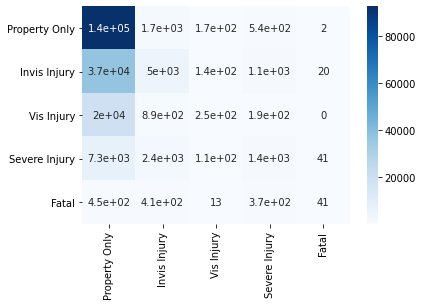

In [0]:
arr = [[144063,   1654,    168,    544,      2],
       [ 37280,   5017,    137,   1095,     20],
       [ 19513,    890,    252,    187,      0],
       [  7347,   2437,    108,   1372,     41],
       [   454,    409,     13,    372,     41]]
labs=['Property Only', 'Invis Injury', 'Vis Injury', 'Severe Injury', 'Fatal']
sns.heatmap(arr, cmap='Blues', robust=True, annot=True, yticklabels=labs, xticklabels=labs)

# Logistic Regression


In [0]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6004112494956988

In [0]:
reg2 = LogisticRegression(solver='newton-cg')
reg2.fit(X_train, y_train)
reg2.score(X_test, y_test)

0.6011530602949023

In [0]:
reg.coef_

array([[-0.67274323, -0.70064858, -0.29810425,  0.00424283, -0.51236248,
        -0.8012124 , -0.96104984, -0.30472521, -0.32660458, -0.54634787,
         0.02489072, -0.0295786 , -0.04710474, -0.01819659,  0.0449227 ,
         0.36418986,  0.00472881,  0.34327393,  0.45695827,  0.22585093,
         0.19194877,  0.18478399,  0.41208833,  0.60176546,  0.90283662,
         0.28133092,  2.18039758,  2.09456294,  1.19050902,  0.79208044,
         0.7647608 ,  1.42838732,  1.42432499,  1.72239069,  0.00313151,
        -0.01879175,  0.01591479, -0.02157004]])

In [0]:
cd_nonInjuries.columns

Index(['Collision_Type_10. Deer', 'Crash_Event_Type_Dsc_23. Animal',
       'Deer_Nodeer', 'Collision_Type_11. Other Animal',
       'Collision_Type_15. Backed Into',
       'Collision_Type_4. Sideswipe - Same Direction',
       'Crash_Event_Type_Dsc_6. Parked Vehicle',
       'First_Harmful_Event_of_Entire_7. In Parking Lane or Zone',
       'Roadway_Surface_Cond_3. Snowy', 'Weather_Condition_6. Snow',
       'Crash_Event_Type_Dsc_7. Tunnel, Bridge, Underpass, Culvert, etc.',
       'First_Harmful_Event_of_Entire_4. Roadside',
       'Driver_Action_Type_Cd_37. Other',
       'Driver_Action_Type_Cd_40. Fail to Maintain Proper Control',
       'Collision_Type_16. Other', 'VDOT_District_5.Hampton Roads District',
       'First_Harmful_Event_of_Entire_9. Outside Right-of-Way',
       'Crash_Event_Type_Dsc_1. Bank Or Ledge',
       'Crash_Event_Type_Dsc_2. Trees',
       'Driver_Action_Type_Cd_2. Exceeded Speed Limit', 'Alcohol_Notalcohol',
       'Driver_Action_Type_Cd_11. Did Not Have Ri

In [0]:
len(reg.coef_[0])

38

In [0]:
coef_list = list(zip(cd_nonInjuries.columns, reg.coef_[0]))

In [0]:
coef_list.sort(key = lambda x: x[1])

In [0]:
coef_list

NameError: ignored

# SVC

In [0]:
idx = np.random.randint(210000, size=70000)

In [0]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train[idx,:], y_train[idx])
svm.score(X_test, y_test)

0.5244537279246216

# Random Forest Classifier

In [0]:
rnd_clf = RandomForestClassifier(n_estimators=200)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rnd_clf.score(X_test, y_test)

0.6093585288720571

#Ensemble Learning

In [0]:
idx = np.random.randint(225000, size=70000)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(n_estimators=100)
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

In [0]:
voting_clf.fit(X_train[idx, :], y_train[idx])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [0]:
voting_clf.score(X_test, y_test)

0.6129114121735056

References:
https://www.fast.ai/2018/07/02/adam-weight-decay/
https://machinelearningmastery.com/improve-deep-learning-performance/
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
